In [2]:
#import libraries

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

Part A

In [68]:
def prostate_segmenter(img, lower_thresh, upper_thresh, seed_point):
    '''Doc String'''
    
    seg = sitk.ConnectedThreshold(image1=img,
                                  seedList=seed_point,
                                  lower=lower_thresh,
                                  upper=upper_thresh,
                                  replaceValue=1)
    
    seg = sitk.BinaryOpeningByReconstruction(seg, kernelRadius=[2]*3)
    seg = sitk.BinaryClosingByReconstruction(seg, kernelRadius=[2]*3)
    
    return seg

    #save volumetric segmentation mask as my_segmentation.nrrd
    #overlay segmentation with MRI data and visualize the middle LP slice of the overlay
    #overlay gold standard implementation in the same way
    #save figures

In [69]:
def resample_to_reference(input_image, reference_image):
    '''doc string'''
#initially I was recieving an error when trying to overlay the gold standard mask on the mri
#this function was added to resample the mask to the same spacing as the MRI
#cite
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(reference_image)
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    resampler.SetTransform(sitk.Transform())
    resampled_image = resampler.Execute(input_image)
    
    return resampled_image

In [83]:
def plot_overlay(img, seg, gs_mask):
    '''Doc String'''
    
    overlay_image = sitk.LabelOverlay(img, seg)
    overlay_array = sitk.GetArrayViewFromImage(overlay_image)[13,:,:]
    
    gs_overlay_image = sitk.LabelOverlay(img, gs_mask)
    gs_overlay_array = sitk.GetArrayViewFromImage(gs_overlay_image)[13,:,:]
    
    plt.subplot(1,2,1)
    plt.title('Region Growing Segmentation')
    plt.imshow(overlay_array, cmap='gray')
    
    plt.subplot(1,2,2)
    plt.title('Gold Standard Segmentation')
    plt.imshow(gs_overlay_array, cmap='gray')
    
    #plt.savefig('segmentation_comparison.png')
    
    plt.show()

Part B

In [98]:
def seg_eval_dice(seg, gs_res):
#https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1LabelOverlapMeasuresImageFilter.html
    '''doc string'''
    #calculate DSC for segmentation results compared with reference mask
    
    dsc = sitk.LabelOverlapMeasuresImageFilter()
    dsc.Execute(seg, gs_res)
    dsc_coef = dsc.GetDiceCoefficient()
    return dsc_coef

Main

In [99]:
def main():
    #read in external files
    gs_mask = sitk.ReadImage("10522_1000532_segmentation.nii")
    img = sitk.ReadImage("10522_1000532_t2wMRI.mha")
    
    #resample gs mask to match mri
    gs_res = resample_to_reference(gs_mask, img)
    
    #perform region growing with fine tuned parameters
    seed_point = [(452,5489,13),(578,523,13),(518,452,13)]
    lower_thresh = 50
    upper_thresh = 150
    seg = prostate_segmenter(img, lower_thresh, upper_thresh, seed_point)
    
    #save segmentation - do this when everything is finalized
    #sitk.WriteImage(otsu_seg, 'my_segmentation.nrrd')
    
    plot_overlay(img, seg, gs_res)
    
    #get dice coefficient
    dsc_coef = seg_eval_dice(seg, gs_res)
    print(f"The dice coefficient is:{dsc_coef}")
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


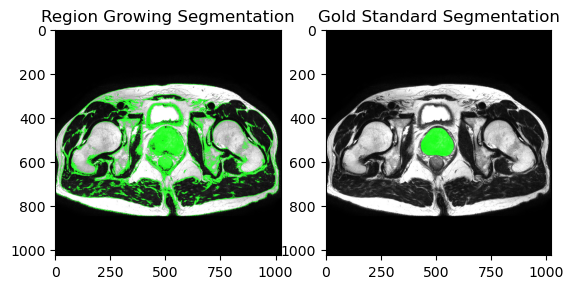

The dice coefficient is:0.08725031885348533


In [100]:
main()

In [101]:
pwd()

'C:\\Users\\julia\\BMIF 804'